In [22]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


# Question 1: Given some sample data, write a program to answer the following

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [11]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [5]:
df['order_amount'].mean()

3145.128

**Anaswer**: An AOV of \$3145.13 was obtained by calculating the mean of the order_amount column. While this do give us the average amount of each order, this number is unresonable because the order_amount is very skewed to the large number. As is shown in the description of this dataframe above, the mean order_amount is \$3145, while the median is only \$258. Therefore, we need to check those orders with large order_amount.

In [38]:
# check top3 largest order_amount
top3 = -np.sort(-df['order_amount'].unique())[:3]
top3

array([704000, 154350, 102900])

In [39]:
df[df['order_amount'].isin(top3)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


Things are clear now. Shop 42 and 78 has many orders with large order_amount. We need to further consider whether to remove their records.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


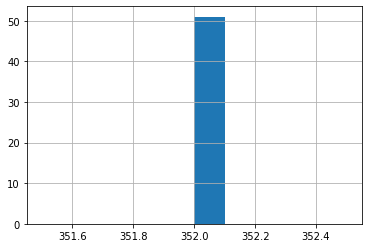

In [72]:
# check unit price of shop 42
df_shop42 = df[df['shop_id'] == 42]
df_shop42['unit_price'] = df_shop42['order_amount'] / df_shop42['total_items']
df_shop42['unit_price'].hist()

Although shop 42 has many suspicous ouders with \$704000 of 2000 shoes, the unit price of all of their orders are all \$352. This is a reasonable price of sneakers. And, given that each shop sells only one model of shoe, we'll not consider this shop as fraud.	

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


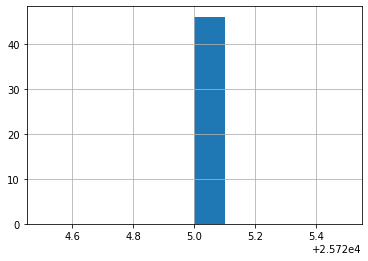

In [77]:
# check unit price of shop 78
df_shop78 = df[df['shop_id'] == 78]
df_shop78['unit_price'] = df_shop78['order_amount'] / df_shop78['total_items']
df_shop78['unit_price'].hist()

Shop 78 also has a unique unit price of \$25725, but it's not a common price for a pair of sneakers. We need to exclude this shop for more accurate analysis.



b. What metric would you report for this dataset?

The first intuitive idea is to remove shop 78 and calculate AOV. The second way is to calculate AOV by each shop (summing up their order_amount and take mean), and they average them to get the final AOV.

Personally, I think the second way makes more sense since different shops have different unit price. We'll confirm this by looking at the values.

c. What is its value?

In [79]:
# 1. remove shop 78
df_no78 = df[df['shop_id'] != 78]
df_no78['order_amount'].mean()

2717.3677836092047

407.99

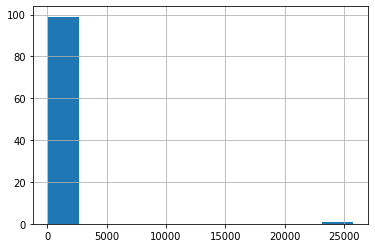

In [94]:
# 2. group by shop
revenue_shop = df.groupby(['shop_id'])['order_amount'].sum()
orders_shop = df.groupby(['shop_id'])['total_items'].sum()
df_AOV = revenue_shop / orders_shop
df_AOV.hist()
np.mean(df_AOV)

152.26262626262627

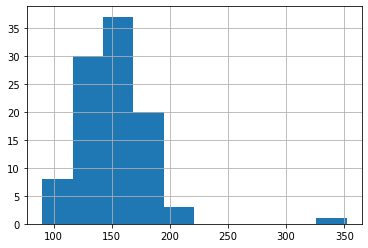

In [95]:
# 3. group by shop (remove shop 78)
revenue_shop = df_no78.groupby(['shop_id'])['order_amount'].sum()
orders_shop = df_no78.groupby(['shop_id'])['total_items'].sum()
df_AOV = revenue_shop / orders_shop
df_AOV.hist()
np.mean(df_AOV)

**Answer**: First, by just removing shop 78, the resulting AOV is \$2717.37 which is still weird.

Second, by calculating AOV of each shop and taking average, the resulting AOV is \$407.99. This looks better, but the histogram shows that shop 78's data (around \$25000) is really a strange value, making the distribution skewed.

Third, after removing shop 78 and do the group by calculation again, the resulting AOV is \$152.26. This histogram confirms that the AOV of all remaining shops are in a reasonable range.

To sum up, a better way to calculate AOV is exclude shops with weird order data (shop 78), group by shop_id and calculate their own AOV, and finally average their AOV. The resulting value is \$152.26.

# Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.



**a. How many orders were shipped by Speedy Express in total?**

SELECT COUNT(DISTINCT o.OrderID) AS Num

FROM Orders o JOIN Shippers s ON o.shipperid = s.shipperid

WHERE s.ShipperName = "Speedy Express"

Result:54

**b. What is the last name of the employee with the most orders?**

SELECT LastName 

FROM Orders o JOIN Employees e ON o.EmployeeID = e.EmployeeID

GROUP BY o.EmployeeID

ORDER BY COUNT(DISTINCT o.OrderID) DESC

LIMIT 1

Result: Peacock

**c. What product was ordered the most by customers in Germany?**

SELECT p.ProductName

FROM Products p JOIN OrderDetails d ON p.ProductID = d.ProductID JOIN Orders o ON d.OrderID = o.OrderID JOIN Customers c ON c.CustomerID = o.CustomerID

WHERE c.Country == "Germany"

GROUP BY p.ProductID

ORDER BY SUM(d.Quantity) DESC

LIMIT 1

Result: Boston Crab Meat